# Tutorial: Coherent Point Drift (CPD) Algorithm for Point Set Registration  

In this tutorial, we will explore the Coherent Point Drift (CPD) algorithm for point set registration. We will go through the background, examples and sample experiments. We will also be looking into the comparison of Coherent Point Drift Algorithm with the standard ICP algorithm for point set registration. Let's start by defining what point set registration is.  

Point set registration is a crucial task in computer vision and robotics, involving aligning two or more sets of points from different sources or time instances to find their spatial correspondence. This alignment is fundamental for various applications like 3D reconstruction, object recognition, and medical image analysis. Iterative Closest Point (ICP)
{cite:p}`zhang_fast_2020` and Coherent Point Drift (CPD) {cite:p}`andriy_myronenko_point_2010` are two prominent algorithms in point set registration. ICP iteratively minimizes the distances between corresponding points in the sets, refining the transformation until convergence. CPD, on the other hand, models the transformation as a probability distribution over the point sets, enabling robust registration even in the presence of outliers and noise. While ICP is efficient for rigid registration, CPD extends to non-rigid transformations, offering versatility in aligning deformable structures like biological tissues or articulated objects. Together, these algorithms constitute powerful tools for accurately aligning point sets across various domains.
  
## Background  
  
Before we dive into the details of CPD, let's briefly discuss the problem of point set registration and the Iterative Closest Point (ICP) algorithm, which is one of the most widely used methods for point set registration.  
  
### Point Set Registration  
  
Given two sets of points \($X = {x_1, x_2, ..., x_N}$\) and \($Y = {y_1, y_2, ..., y_M}$\), the goal of point set registration is to find a transformation \(T\) such that when applied to \(X\), the transformed points are aligned as closely as possible to \(Y\).

### Iterative Closest Point (ICP) Algorithm  
  
ICP is an iterative optimization algorithm commonly used for point set registration. It alternates between two steps:  
  
1. **Correspondence Estimation**: Given the current transformation \(T\), find the correspondence between points in \(X\) and \(Y\).  
2. **Transformation Estimation**: Given the correspondence, estimate the transformation \(T\) that aligns \(X\) with \(Y\).  
  
ICP repeats these steps until convergence.  
  
While ICP is effective, it can be sensitive to noise and outliers, and it may converge to local minima. CPD, on the other hand, addresses some of these limitations by incorporating coherence information and introducing soft correspondences.

## Coherent Point Drift (CPD) Algorithm  
  
The Coherent Point Drift (CPD) algorithm, introduced by Andriy Myronenko and Xubo Song in their paper "Point Set Registration: Coherent Point Drift" (2009) {cite:p}`andriy_myronenko_point_2010`, is a powerful method for point set registration. CPD extends traditional point set registration methods by introducing a probabilistic framework that models the point set correspondences as a Gaussian Mixture Model (GMM). This allows CPD to handle noise, outliers, and partial overlap between point sets more effectively than traditional methods like ICP.  
  
### Algorithm Overview  
  
The CPD algorithm can be summarized in the following steps:  
  
1. **Initialization**: Initialize the transformation \(T\) and the parameters such as translation, rotation, and scaling, which define the initial alignment between the two point sets. We also estimate the covariance matrix and the scaling factor for the Gaussian Mixture Model (GMM) that represents the probability distribution of the transformation.  
2. **Expectation Step**: Compute the expected correspondence probabilities between points in \(X\) and \(Y\) point sets using the GMM and the current transformation parameters and update the weights and means of the GMM based on the current correspondences.  
3. **Maximization Step**: Update the transformation parameters to maximize the likelihood of the correspondences of the transformation \(T\). This involves updating the translation, rotation, scaling, and the parameters of the GMM (mean, covariance, and mixture coefficients).
4. **Iteration**: Check whether the algorithm has converged by comparing the change in transformation parameters between iterations with a predefined threshold. If convergence criteria are met, exit the algorithm; otherwise, return to step 2.  
5. **Output**: Once convergence is achieved, the final transformation parameters represent the aligned positions of the source points with respect to the target points.

Now, let's go through each step of the CPD algorithm in more detail.  
  
### Expectation Step  
  
In the Expectation step, we compute soft correspondences between points in \(X\) and \(Y\). This is done by estimating the posterior probability that a point in \(X\) corresponds to a point in \(Y\) given the current transformation \(T\) and the parameters of the GMM. The soft correspondences are computed using Bayes' theorem:  
  
$$
P(w_{ij} | x_i, y_j, T) = \frac{\pi_j \mathcal{N}(y_j | \mu_j, \Sigma_j)}{\sum_{k=1}^M \pi_k \mathcal{N}(y_j | \mu_k, \Sigma_k)}  
$$
  
where:  
- $(w_{ij})$ is the soft correspondence weight between $(x_i)$ and $(y_j)$.  
- $(\pi_j)$ is the mixing coefficient of the $(j^{th})$ component of the GMM.  
- $(\mathcal{N}(y_j | \mu_j, \Sigma_j))$ is the Gaussian distribution representing the $(j^{th})$ component of the GMM.  
- The denominator is the normalization term ensuring that the weights sum up to 1.  
  
### Maximization Step  
  
In the Maximization step, we update the parameters of the GMM and estimate the transformation \(T\) that maximizes the likelihood of the soft correspondences. This involves solving an optimization problem to find the optimal transformation and updating the parameters of the GMM using the weighted point correspondences.


## Point Cloud Registration with CPD Example Code 
#### (https://siavashk.github.io/2017/05/14/coherent-point-drift/)
Let's start off with a simple toy example. Assume that we have two point clouds \( $X = { X1, X2, X3 }$ \) and \( $Y = { Y1, Y2, Y3 }$ \) . These point clouds are shown in Figure 1 with red and blue circles, respectively. Our goal is to find the transformation that best aligns the two point clouds.

In this toy example, the unknown transformation is a rotation around the origin (parameterized by $\theta$ followed by a translation (parameterized by \(t\)). Assume, the actual value of the unknown parameters is \{ $\theta^{\circ}$, t=\(0.2, 0.2\) \} . We can use numpy to define the two point clouds as seen in the following code snippet:


In [1]:
import numpy as np

# transformation parameters
theta = np.pi/6.0
t = np.array([[0.2], [0.2]])

# rotation matrix
R = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta), np.cos(theta)]])
X = np.array([[0, 0, 10], [0, 10, 0]])
Y = np.dot(R, X) + t

xLabels = ["X1", "X2", "X3"]
yLabels = ["Y1", "Y2", "Y3"]

Plotting the two point clouds results in Figure 1. Now, since this is a toy example, we already know the correspondences between points in the two point clouds. The corresponding points are linked using the black dashed line. If the correspondences are known, the solution to the rigid registration is known as the orthogonal Procrustes problem:

$$\mathrm{argmin}_{R,t}\Vert{X - RY - t}\Vert^2, \quad \mathrm{s.t} \quad R^TR=I$$

![Point Cloud Registration](D:/PointSetRegistration/output/assets/cpd/registration1_1_0.png)<br/>

## Missing Correspondences
When correspondence is not explicitly known, point cloud registration algorithms implicitly assume that correspondence can be inferred through point proximity. In other words, points that are spatially close to each other correspond to one another.

We can assign an arbitrary correspondence probability to point clouds based on proximity. Figure 2 shows an example probability distribution based on proximity.

Points that are closer than a radius of \(r=0.2\) would confident matches, and we would assign a correspondence confidence of \(p=1.0\) to them. Pairs such as \(\(X1, Y1\)\) and \(\(X2, Y2\)\) pairs have a distance between \(r=0.2\) and \(r=0.4\) units are probable but not confident matches, so we could assign a probability of \(p=0.5\) to them. Beyond this, there is probably no correspondence, so our probability would drop to zero.

Even though this approach is quite simple, it provides two distinct advantages. First, it allows us to assign correspondences so that we can solve the registration as a Procrustes problem. Furthermore, it also allows us to weigh the loss functional according to the correspondence probability.
<br>
![Point Cloud Correspondences](D:/PointSetRegistration/output/assets/cpd/registration1_2_0.png)<br/>

## Gaussian Mixture Models
We will now side step from the point cloud registration problem briefly. Instead of dealing with \(X, Y\) point clouds directly, we construct a GMM from the moving point cloud, \(Y\), and treat \(X\) as observations from that GMM. In Figure 3, we have constructed a GMM where the three Gaussians have a variance of 0.75 units. Blue points, i.e. Gaussian centroids, are the transformed moving points (\(Y\)). Red points, i.e. the fixed point cloud \(X\), are observations from this GMM. Isocontours represent the log-likelihood that red points are sampled from this GMM.

<br>![Constructed GMM](D:/PointSetRegistration/output/assets/cpd/registration1_3_0.png)<br/>

## GMM-based Registration
In order to perform registration, we have to solve correspondence and moving point cloud transformation problems simultaneously. This is done through expectation-maximization (EM) optimization. To solve the correspondence problem, we need to find which Gaussian the observed point cloud was sampled from (E-step). This provides us with correspondence probability, similar to Figure 2. Once correspondences probabilities are known, we maximize the negative log-likelihood that the observed points were sampled from the GMM with respect to transformation parameters (M-step).

## Expectation Step
In Figure 3, if there was only one Gaussian component in the mixture, then the probability that a point \(x\) is sampled from this Gaussian is given using probability density distribution of the [multivairate normal distribution](https://en.wikipedia.org/wiki/Multivariate_normal_distribution#Density_function). For the 2D case, with isotropic Gaussians, this simplifies to:

$$p(X) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp({-\frac{\Vert{X - RY - t}\Vert^2}{2\sigma^2}})$$

However, since we are dealing with multiple Gaussians, we need to normalize this probability by the contribution of all Gaussian centroids. In the pycpd package, this is achieved (minor tweaks to simplify the explanation) using the following snippet:

In [13]:
import numpy as np

def EStep(X, Y, sigma2):
  M = Y.shape[0] # number of moving points
  D = Y.shape[1] # dimensionality of moving points
  N = X.shape[0] # number of fixed points
  # Probability matrix: p_{ij} is the probability
  # that moving point i corresponds to fixed point j
  P = np.zeros((M, N))

  for i in range(0, M):
      diff     = X - np.tile(Y[i, :], (N, 1))
      diff    = np.multiply(diff, diff)
      P[i, :] = P[i, :] + np.sum(diff, axis=1)

  P = np.exp(-P / (2 * sigma2))
  den = np.sum(P, axis=0)
  den = np.tile(den, (M, 1))
  den[den==0] = np.finfo(float).eps

  P = np.divide(P, den)
  Pt1 = np.sum(P, axis=0)
  P1  = np.sum(P, axis=1)
  Np  = np.sum(P1)
  return P, Pt1, P1, Np

## Maximization Step
Once correspondence probabilities are known, i.e. \(P\), we can solve for the transformation parameters. In the case of rigid registration, these transform parameters are the rotation matrix and the translation vector. In the pycpd package, this is achieved using the following snippet:

In [3]:
import numpy as np

def MStep(X, Y, P):
  s, R, t, A, XX = updateTransform(X, Y, P, P1, Np)
  sigma2 = updateVariance(R, A, XX, Np, D)

def updateTransform(X, Y, P):
  muX = np.divide(np.sum(np.dot(P, X), axis=0), Np)
  muY = np.divide(np.sum(np.dot(np.transpose(P), Y), axis=0), Np)

  XX = X - np.tile(muX, (N, 1))
  YY = Y - np.tile(muY, (M, 1))

  A = np.dot(np.transpose(XX), np.transpose(P))
  A = np.dot(A, YY)

  U, _, V = np.linalg.svd(A, full_matrices=True)
  C = np.ones((D, ))
  C[D-1] = np.linalg.det(np.dot(U, V))

  R = np.dot(np.dot(U, np.diag(C)), V)

  YPY = np.dot(np.transpose(P1), np.sum(np.multiply(YY, YY), axis=1))

  s = np.trace(np.dot(np.transpose(A), R)) / YPY

  t = np.transpose(muX) - s * np.dot(R, np.transpose(muY))
  return s, R, t, A, XX

def updateVariance(R, A, XX, Np, D):
  trAR = np.trace(np.dot(A, np.transpose(R)))
  xPx = np.dot(np.transpose(Pt1), np.sum(np.multiply(XX, XX), axis =1))
  sigma2 = (xPx - s * trAR) / (Np * D)
  return sigma2

## ICP Algorithm

The best_fit_transform function calculates the least-squares best-fit transform that maps corresponding points from one point set to another in m spatial dimensions. Given two sets of corresponding points A and B, it computes the optimal rotation matrix R and translation vector t that minimize the squared Euclidean distance between the transformed points and their corresponding points in the other set. This function is a fundamental building block used in point set registration algorithms like ICP (Iterative Closest Point) and CPD (Coherent Point Drift).

In [5]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def best_fit_transform(A, B):
    '''
    Calculates the least-squares best-fit transform that maps corresponding points A to B in m spatial dimensions
    Input:
      A: Nxm numpy array of corresponding points
      B: Nxm numpy array of corresponding points
    Returns:
      T: (m+1)x(m+1) homogeneous transformation matrix that maps A on to B
      R: mxm rotation matrix
      t: mx1 translation vector
    '''

    assert A.shape == B.shape

    # get number of dimensions
    m = A.shape[1]

    # translate points to their centroids
    centroid_A = np.mean(A, axis=0)
    centroid_B = np.mean(B, axis=0)
    AA = A - centroid_A
    BB = B - centroid_B

    # rotation matrix
    H = np.dot(AA.T, BB)
    U, S, Vt = np.linalg.svd(H)
    R = np.dot(Vt.T, U.T)

    # special reflection case
    if np.linalg.det(R) < 0:
       Vt[m-1,:] *= -1
       R = np.dot(Vt.T, U.T)

    # translation
    t = centroid_B.T - np.dot(R,centroid_A.T)

    # homogeneous transformation
    T = np.identity(m+1)
    T[:m, :m] = R
    T[:m, m] = t

    return T, R, t

The nearest_neighbor function finds the nearest (Euclidean) neighbor in a destination point set for each point in a source point set. Given two sets of points, src and dst, it computes the Euclidean distances and indices of the nearest neighbor in the destination set for each point in the source set. This function is commonly used in point set registration algorithms to establish point correspondences between two sets of points.

In [6]:
def nearest_neighbor(src, dst):
    '''
    Find the nearest (Euclidean) neighbor in dst for each point in src
    Input:
        src: Nxm array of points
        dst: Nxm array of points
    Output:
        distances: Euclidean distances of the nearest neighbor
        indices: dst indices of the nearest neighbor
    '''

    assert src.shape == dst.shape

    neigh = NearestNeighbors(n_neighbors=1)
    neigh.fit(dst)
    distances, indices = neigh.kneighbors(src, return_distance=True)
    return distances.ravel(), indices.ravel()

The icp function implements the Iterative Closest Point (ICP) algorithm, which aims to find the best-fit transform that maps points from one point set onto another. Given two sets of points, A and B, it iteratively refines the transformation parameters to minimize the Euclidean distance between corresponding points. This iterative process continues until convergence or a maximum number of iterations is reached. The function returns the final homogeneous transformation matrix, Euclidean distances of the nearest neighbor, and the number of iterations taken to converge.

In [7]:
def icp(A, B, init_pose=None, max_iterations=20, tolerance=0.001):
    '''
    The Iterative Closest Point method: finds best-fit transform that maps points A on to points B
    Input:
        A: Nxm numpy array of source mD points
        B: Nxm numpy array of destination mD point
        init_pose: (m+1)x(m+1) homogeneous transformation
        max_iterations: exit algorithm after max_iterations
        tolerance: convergence criteria
    Output:
        T: final homogeneous transformation that maps A on to B
        distances: Euclidean distances (errors) of the nearest neighbor
        i: number of iterations to converge
    '''

    assert A.shape == B.shape

    # get number of dimensions
    m = A.shape[1]

    # make points homogeneous, copy them to maintain the originals
    src = np.ones((m+1,A.shape[0]))
    dst = np.ones((m+1,B.shape[0]))
    src[:m,:] = np.copy(A.T)
    dst[:m,:] = np.copy(B.T)

    # apply the initial pose estimation
    if init_pose is not None:
        src = np.dot(init_pose, src)

    prev_error = 0

    for i in range(max_iterations):
        # find the nearest neighbors between the current source and destination points
        distances, indices = nearest_neighbor(src[:m,:].T, dst[:m,:].T)

        # compute the transformation between the current source and nearest destination points
        T,_,_ = best_fit_transform(src[:m,:].T, dst[:m,indices].T)

        # update the current source
        src = np.dot(T, src)

        # check error
        mean_error = np.mean(distances)
        if np.abs(prev_error - mean_error) < tolerance:
            break
        prev_error = mean_error

    # calculate final transformation
    T,_,_ = best_fit_transform(A, src[:m,:].T)

    return T, distances, i

The rotation_matrix function generates a rotation matrix for a given axis and angle of rotation. It takes an axis vector and an angle in radians as inputs and returns a 3x3 rotation matrix representing the rotation around the given axis. This function is commonly used in various geometric transformations and is used for generating rotation matrices required in ICP.

In [8]:
def rotation_matrix(axis, theta):
    axis = axis/np.sqrt(np.dot(axis, axis))
    a = np.cos(theta/2.)
    b, c, d = -axis*np.sin(theta/2.)

    return np.array([[a*a+b*b-c*c-d*d, 2*(b*c-a*d), 2*(b*d+a*c)],
                  [2*(b*c+a*d), a*a+c*c-b*b-d*d, 2*(c*d-a*b)],
                  [2*(b*d-a*c), 2*(c*d+a*b), a*a+d*d-b*b-c*c]])

In [9]:
def visualize_point_cloud(A, B, title_A='Original', title_B='Transformed'):
    fig = plt.figure(figsize=(10, 5))

    # Plotting original point cloud
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.scatter(A[:, 0], A[:, 1], A[:, 2], c='b', label=title_A)
    ax1.set_title(title_A)
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    ax1.legend()

    # Plotting transformed point cloud
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.scatter(B[:, 0], B[:, 1], B[:, 2], c='r', label=title_B)
    ax2.set_title(title_B)
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('Z')
    ax2.legend()

    plt.show()

In [34]:
# Constants
N = 100                                    # number of random points in the dataset
num_tests = 100                             # number of test iterations
dim = 3                                     # number of dimensions of the points
noise_sigma = .01                           # standard deviation error to be added
translation = .1                            # max translation of the test set
rotation = .1                               # max rotation (radians) of the test set

def test_best_fit():

    # Generate a random dataset
    A = np.random.rand(N, dim)

    total_time = 0

    for i in range(num_tests):

        B = np.copy(A)

        # Translate
        t = np.random.rand(dim)*translation
        B += t

        # Rotate
        R = rotation_matrix(np.random.rand(dim), np.random.rand()*rotation)
        B = np.dot(R, B.T).T

        # Add noise
        B += np.random.randn(N, dim) * noise_sigma

        # Find best fit transform
        start = time.time()
        T, R1, t1 = best_fit_transform(B, A)
        total_time += time.time() - start

        # Make C a homogeneous representation of B
        C = np.ones((N, 4))
        C[:,0:3] = B

        # Transform C
        C = np.dot(T, C.T).T
        
        assert np.allclose(C[:,0:3], A, atol=6*noise_sigma) # T should transform B (or C) to A
        assert np.allclose(-t1, t, atol=6*noise_sigma)      # t and t1 should be inverses
        assert np.allclose(R1.T, R, atol=6*noise_sigma)     # R and R1 should be inverses
    visualize_point_cloud(A, C, title_A='Original', title_B='Transformed')
    print('best fit time: {:.3}'.format(total_time/num_tests))

    return


def test_icp():

    # Generate a random dataset
    A = np.random.rand(N, dim)

    total_time = 0

    for i in range(num_tests):

        B = np.copy(A)

        # Translate
        t = np.random.rand(dim)*translation
        B += t

        # Rotate
        R = rotation_matrix(np.random.rand(dim), np.random.rand() * rotation)
        B = np.dot(R, B.T).T

        # Add noise
        B += np.random.randn(N, dim) * noise_sigma

        # Shuffle to disrupt correspondence
        np.random.shuffle(B)

        # Run ICP
        start = time.time()
        T, distances, iterations = icp(B, A, tolerance=0.000001)
        total_time += time.time() - start

        # Make C a homogeneous representation of B
        C = np.ones((N, 4))
        C[:,0:3] = np.copy(B)

        # Transform C
        C = np.dot(T, C.T).T
        
        assert np.mean(distances) < 6*noise_sigma                   # mean error should be small
        assert np.allclose(T[0:3,0:3].T, R, atol=6*noise_sigma)     # T and R should be inverses
        assert np.allclose(-T[0:3,3], t, atol=6*noise_sigma)        # T and t should be inverses
    visualize_point_cloud(A, C, title_A='Original', title_B='Transformed')
    print('Mean Error:', np.mean(distances))
    print('icp time: {:.3}'.format(total_time/num_tests))

    return





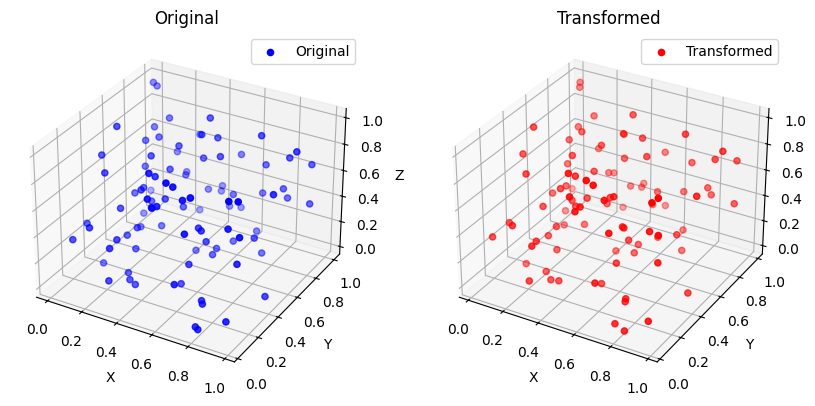

best fit time: 2.02e-05


In [35]:
test_best_fit()

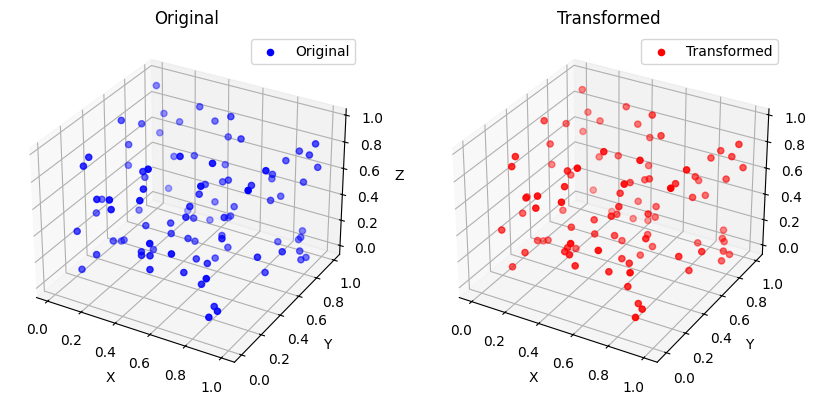

Mean Error: 0.01668003023982557
icp time: 0.00316


In [36]:
test_icp()

In [37]:
def cpd(A, B, max_iterations=50, tolerance=0.001):
    '''
    Coherent Point Drift (CPD) algorithm: finds best-fit transform that maps points A onto points B
    Input:
        A: Nxm numpy array of source mD points
        B: Nxm numpy array of destination mD points
        max_iterations: exit algorithm after max_iterations
        tolerance: convergence criteria
    Output:
        T: final homogeneous transformation that maps A onto B
        distances: Euclidean distances (errors) of the nearest neighbor
        i: number of iterations to converge
    '''

    assert A.shape == B.shape

    # get number of dimensions
    m = A.shape[1]

    # make points homogeneous, copy them to maintain the originals
    src = np.ones((m+1, A.shape[0]))
    dst = np.ones((m+1, B.shape[0]))
    src[:m, :] = np.copy(A.T)
    dst[:m, :] = np.copy(B.T)

    prev_error = 0

    for i in range(max_iterations):
        # E-step: calculate the expected correspondence probabilities
        P = calculate_correspondence_probabilities(src[:m, :].T, dst[:m, :].T)

        # M-step: update the transformation parameters
        T = update_transformation(src, dst, P)

        # update the current source
        src = np.dot(T, src)

        # check error
        mean_error = np.mean(P)
        if np.abs(prev_error - mean_error) < tolerance:
            break
        prev_error = mean_error

    # calculate final transformation
    T = update_transformation(src, dst, P)

    return T, np.sqrt(P), i


def calculate_correspondence_probabilities(src, dst):
    '''
    Calculate the expected correspondence probabilities between points in src and dst
    Input:
        src: Nxm array of source points
        dst: Nxm array of destination points
    Output:
        P: N-dimensional array of correspondence probabilities
    '''

    distances, _ = nearest_neighbor(src, dst)
    sigma2 = np.mean(distances) ** 2
    P = np.exp(-distances**2 / (2 * sigma2))
    return P


def update_transformation(src, dst, P):
    '''
    Update the transformation between src and dst based on the correspondence probabilities P
    Input:
        src: (m+1)xN array of source points
        dst: (m+1)xN array of destination points
        P: N-dimensional array of correspondence probabilities
    Output:
        T: (m+1)x(m+1) homogeneous transformation matrix
    '''

    # calculate normalization factor
    sum_P = np.sum(P)

    # weighted centering
    mu_src = np.dot(src, P) / sum_P
    mu_dst = np.dot(dst, P) / sum_P

    src_demean = src - mu_src[:, np.newaxis]
    dst_demean = dst - mu_dst[:, np.newaxis]

    # cross covariance matrix
    H = np.dot(src_demean * P, dst_demean.T)

    # singular value decomposition
    U, _, Vt = np.linalg.svd(H)

    # compute rotation and translation
    R = np.dot(Vt.T, U.T)
    t = mu_dst - np.dot(R, mu_src)

    # ensure R is a 3x3 matrix
    R = R[:3, :3]

    # homogeneous transformation
    m = src.shape[0] - 1  # number of dimensions
    T = np.identity(m + 1)
    T[:m, :m] = R
    T[:m, m] = t[:m]

    return T




In [40]:
# Constants
N = 100                                    # number of random points in the dataset
num_tests = 100                             # number of test iterations
dim = 3                                     # number of dimensions of the points
noise_sigma = .01                           # standard deviation error to be added
translation = .1                            # max translation of the test set
rotation = .1                               # max rotation (radians) of the test set

def test_cpd():

    total_time = 0

    for i in range(num_tests):
        # Generate a random dataset A
        A = np.random.rand(N, dim)

        # Create a copy of A and apply transformations
        B = np.copy(A)

        # Translate
        t = np.random.rand(dim) * translation
        B += t

        # Rotate
        R = rotation_matrix(np.random.rand(dim), np.random.rand() * rotation)
        B = np.dot(R, B.T).T

        # Add noise
        B += np.random.randn(N, dim) * noise_sigma

        # Shuffle to disrupt correspondence
        np.random.shuffle(B)

        # Run CPD
        start = time.time()
        T, distances, iterations = cpd(B, A, max_iterations=50, tolerance=0.00001)
        total_time += time.time() - start

        # Apply the transformation to point set B
        C = np.dot(T, np.vstack((B.T, np.ones((1, B.shape[0])))))

        # Transformed point set is the first m rows of C, transpose for compatibility with visualize_point_cloud
        C = C[:3, :].T
        # assert np.mean(distances) < 6*noise_sigma                   # mean error should be small
        # assert np.allclose(T[0:3,0:3].T, R, atol=6*noise_sigma)     # T and R should be inverses
        # assert np.allclose(-T[0:3,3], t, atol=6*noise_sigma)        # T and t should be inverses
        
    # Visualize the original and transformed point sets
    visualize_point_cloud(A, C, title_A='Original', title_B='Transformed')
    print('Mean Error:', np.mean(distances))
    print('CPD average time: {:.3}'.format(total_time / num_tests))

    return


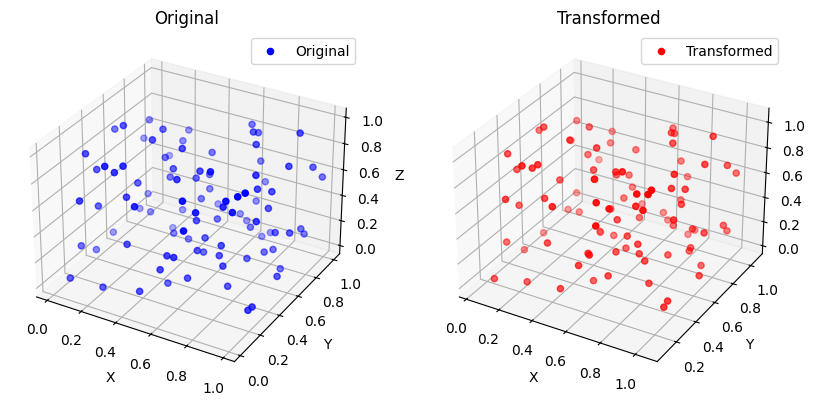

Mean Error: 0.7667183338709921
CPD average time: 0.0325


In [41]:
test_cpd()

```{bibliography}
:style: unsrt
```

In [ ]:
import numpy as np
import open3d as o3
import transforms3d as t3d
from probreg import cpd
from probreg import callbacks
import utils
import logging
log = logging.getLogger('probreg')
log.setLevel(logging.DEBUG)

source, target = utils.prepare_source_and_target_rigid_3d('data/bunny.pcd')

cbs = [callbacks.Open3dVisualizerCallback(source, target)]
tf_param, _, _ = cpd.registration_cpd(source, target,
                                      callbacks=cbs)

print("result: ", np.rad2deg(t3d.euler.mat2euler(tf_param.rot)),tf_param.scale, tf_param.t)

In [ ]:
source, target = utils.prepare_source_and_target_rigid_3d('data/cloud_0.pcd')

cbs = [callbacks.Open3dVisualizerCallback(source, target)]
tf_param, _, _ = cpd.registration_cpd(source, target,
                                      callbacks=cbs)

print("result: ", np.rad2deg(t3d.euler.mat2euler(tf_param.rot)),tf_param.scale, tf_param.t)